<center> Tarea Nº7 </center>
<center>Métodos Númericos</center>

**Tema:** Splines Cúbicos

**Nombre:** Lenin Amangandi

[Enlace GitHub Tarea 7](https://github.com/Lenin27Amangandi/Workspace-Metodos-Numericos-2k25A-/tree/main/Tareas/Tarea7)

## Ejercicio 1

Dados los puntos (0,1) , (1,5) , (2,3) determine el spline cúbico


Coeficientes del Spline:
Intervalo      a      b       c       d
   [0, 1] 1.0000 5.5000  0.0000 -1.5000
   [1, 2] 5.0000 1.0000 -4.5000  1.5000

Ecuaciones del Spline:
Intervalo                                                      Ecuación
   [0, 1] S_0(x) = 1.00 + 5.50(x-0.00) + 0.00(x-0.00)² + -1.50(x-0.00)³
   [1, 2] S_1(x) = 5.00 + 1.00(x-1.00) + -4.50(x-1.00)² + 1.50(x-1.00)³


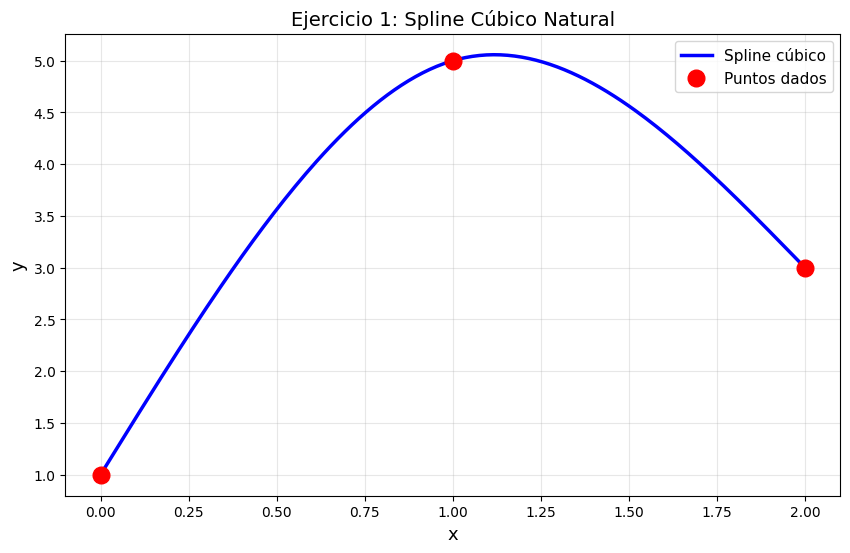

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def spline_natural(x, y):
    n = len(x) - 1
    h = np.diff(x)
    A = np.zeros((n+1, n+1))
    b = np.zeros(n+1)
    
    A[0, 0] = 1  
    for i in range(1, n):
        A[i, i-1:i+2] = [h[i-1], 2*(h[i-1]+h[i]), h[i]]
        b[i] = 3*((y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1])
    A[n, n] = 1
    
    c = np.linalg.solve(A, b)
    a = y[:-1]
    coef_b = np.zeros(n)
    d = np.zeros(n)
    
    for i in range(n):
        coef_b[i] = (y[i+1]-y[i])/h[i] - h[i]*(2*c[i]+c[i+1])/3
        d[i] = (c[i+1]-c[i])/(3*h[i])
    
    return a, coef_b, c[:-1], d

def evaluar_spline(x_data, coef, x_eval):
    a, b, c, d = coef
    y = np.zeros_like(x_eval)
    for i, xi in enumerate(x_eval):
        j = np.searchsorted(x_data[1:], xi)
        j = min(j, len(a)-1)
        dx = xi - x_data[j]
        y[i] = a[j] + b[j]*dx + c[j]*dx**2 + d[j]*dx**3
    return y

def crear_tabla_coeficientes(x, a, b, c, d):
    tabla = pd.DataFrame({
        'Intervalo': [f'[{x[i]}, {x[i+1]}]' for i in range(len(a))],
        'a': [f'{a[i]:.4f}' for i in range(len(a))],
        'b': [f'{b[i]:.4f}' for i in range(len(b))],
        'c': [f'{c[i]:.4f}' for i in range(len(c))],
        'd': [f'{d[i]:.4f}' for i in range(len(d))],
    })
    print("\nCoeficientes del Spline:")
    print(tabla.to_string(index=False))

def crear_tabla_ecuaciones(x, a, b, c, d):
    ecuaciones = []
    for i in range(len(a)):
        ecuacion = f"S_{i}(x) = {a[i]:.2f} + {b[i]:.2f}(x-{x[i]:.2f}) + {c[i]:.2f}(x-{x[i]:.2f})² + {d[i]:.2f}(x-{x[i]:.2f})³"
        ecuaciones.append(ecuacion)

    tabla_ecuaciones = pd.DataFrame({
        'Intervalo': [f'[{x[i]}, {x[i+1]}]' for i in range(len(a))],
        'Ecuación': ecuaciones
    })
    print("\nEcuaciones del Spline:")
    print(tabla_ecuaciones.to_string(index=False))

x = np.array([0, 1, 2])
y = np.array([1, 5, 3])

a, b, c, d = spline_natural(x, y)
crear_tabla_coeficientes(x, a, b, c, d)
crear_tabla_ecuaciones(x, a, b, c, d)

x_plot = np.linspace(0, 2, 200)
y_plot = evaluar_spline(x, (a, b, c, d), x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, 'b-', linewidth=2.5, label='Spline cúbico')
plt.plot(x, y, 'ro', markersize=12, label='Puntos dados')
plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('Ejercicio 1: Spline Cúbico Natural', fontsize=14)
plt.legend(fontsize=11)
plt.show()


## Ejercicio 2

Dado los puntos (-1, 1) y (1, 3), determina el spline cúbico sabiendo que:

- $$ f'(x_0) = 1 $$
- $$ f'(x_n) = 2 $$

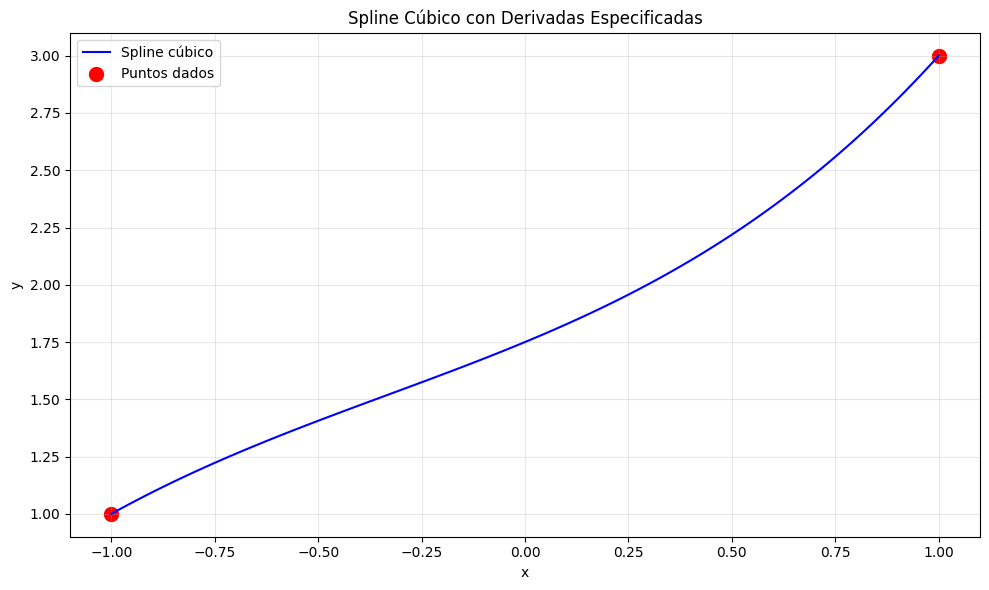


Ecuación del spline cúbico:
S(x) = 1.00 + 1.00(x+1) + -0.50(x+1)^2 + 0.25(x+1)^3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos del problema
x = np.array([-1, 1])
y = np.array([1, 3])
derivadas = np.array([1, 2])  # f'(-1)=1, f'(1)=2

# Coeficientes obtenidos manualmente
a, b, c, d = 1, 1, -0.5, 0.25

# Definición del spline
def S(x_val):
    return a + b*(x_val + 1) + c*(x_val + 1)**2 + d*(x_val + 1)**3

# Definición de la derivada
def S_prime(x_val):
    return b + 2*c*(x_val + 1) + 3*d*(x_val + 1)**2

# Crear datos para graficar
x_vals = np.linspace(-1, 1, 100)
y_vals = S(x_vals)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, 'b-', label='Spline cúbico')
plt.scatter(x, y, color='red', s=100, label='Puntos dados')

plt.title('Spline Cúbico con Derivadas Especificadas')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


print("\nEcuación del spline cúbico:")
print(f"S(x) = {a:.2f} + {b:.2f}(x+1) + {c:.2f}(x+1)^2 + {d:.2f}(x+1)^3")


## Ejercicio 3 

Diríjase al pseudocódigo del spline cúbico con frontera natural provisto en clase, en base a ese pseudocódigo complete la siguiente función:

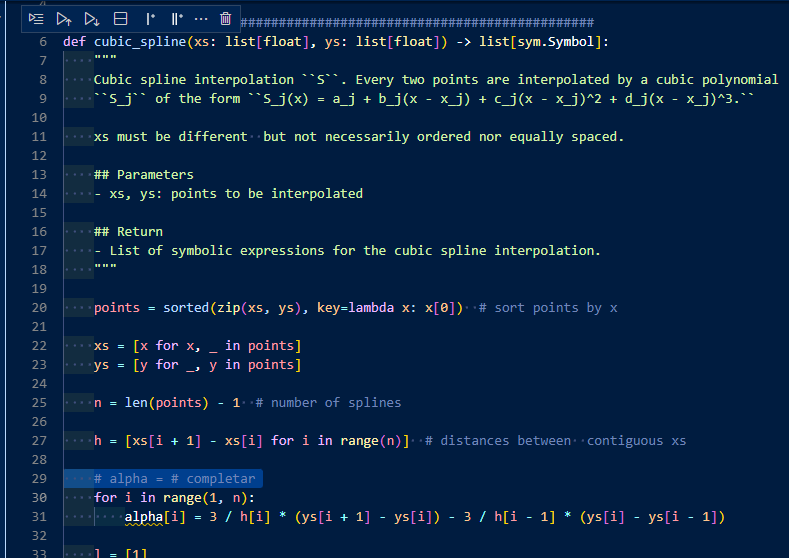

In [15]:
import sympy as sym
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:

    points = sorted(zip(xs, ys), key=lambda x: x[0])
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    
    n = len(points) - 1  
    h = [xs[i+1] - xs[i] for i in range(n)]  
    
    alpha = [0] * (n+1)
    for i in range(1, n):
        alpha[i] = (3/h[i])*(ys[i+1]-ys[i]) - (3/h[i-1])*(ys[i]-ys[i-1])
    
    l = [1.0] 
    mu = [0.0]  
    z = [0.0]   
    
    for i in range(1, n):
        l.append(2*(xs[i+1]-xs[i-1]) - h[i-1]*mu[i-1])
        mu.append(h[i]/l[i])
        z.append((alpha[i] - h[i-1]*z[i-1])/l[i])
    
    l.append(1.0)
    z.append(0.0)
    c = [0.0]*(n+1)
    
    for i in range(n-1, -1, -1):
        c[i] = z[i] - mu[i]*c[i+1]
    
    x = sym.Symbol('x')
    splines = []
    
    for j in range(n):
        a = ys[j]
        b = (ys[j+1]-ys[j])/h[j] - h[j]*(c[j+1]+2*c[j])/3
        d = (c[j+1]-c[j])/(3*h[j])
        
        S = a + b*(x-xs[j]) + c[j]*(x-xs[j])**2 + d*(x-xs[j])**3
        splines.append(S)
    
    return splines

In [17]:
xs = [1, 2, 3]
ys = [-5, -4, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

-0.5*x + 1.5*(x - 1)**3 - 4.5

4.0*x - 1.5*(x - 2)**3 + 4.5*(x - 2)**2 - 12.0

______


1.5*x**3 - 4.5*x**2 + 4.0*x - 6.0

-1.5*x**3 + 13.5*x**2 - 32.0*x + 18.0

## Ejercicio 4

Usando la función anterior, encuentre el spline cúbico para:

- $$ xs = [1, 2, 3] $$
- $$ ys = [2, 3, 5] $$


Coeficientes del Spline:
Intervalo      a      b      c       d
   [1, 2] 2.0000 0.7500 0.0000  0.2500
   [2, 3] 3.0000 1.5000 0.7500 -0.2500

Ecuaciones del Spline:
Intervalo                                                      Ecuación
   [1, 2]  S_0(x) = 2.00 + 0.75(x-1.00) + 0.00(x-1.00)² + 0.25(x-1.00)³
   [2, 3] S_1(x) = 3.00 + 1.50(x-2.00) + 0.75(x-2.00)² + -0.25(x-2.00)³


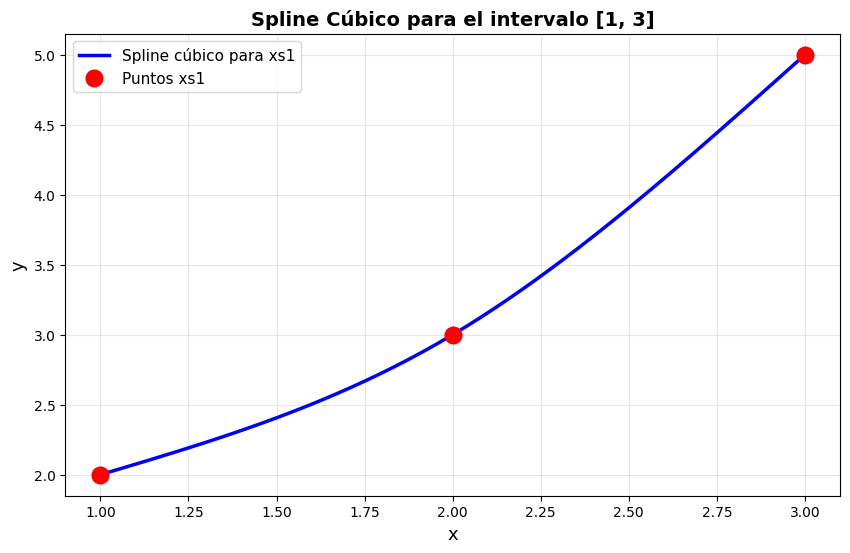

In [ ]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]) -> list:
    points = sorted(zip(xs, ys), key=lambda x: x[0])

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]

    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l.append(2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])

    l.append(1)
    z.append(0)

    c = [0] * (n + 1)

    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]

    b = [(ys[i + 1] - ys[i]) / h[i] - h[i] * (c[i + 1] + 2 * c[i]) / 3 for i in range(n)]
    d = [(c[i + 1] - c[i]) / (3 * h[i]) for i in range(n)]
    a = [ys[i] for i in range(n)]

    return a, b, c[:-1], d

def evaluar_spline(x_data, coef, x_eval):
    a, b, c, d = coef
    y = np.zeros_like(x_eval)
    for i, xi in enumerate(x_eval):
        j = np.searchsorted(x_data[1:], xi)
        j = min(j, len(a)-1)
        dx = xi - x_data[j]
        y[i] = a[j] + b[j]*dx + c[j]*dx**2 + d[j]*dx**3
    return y

def crear_tabla_coeficientes(x, a, b, c, d):
    tabla = pd.DataFrame({
        'Intervalo': [f'[{x[i]}, {x[i+1]}]' for i in range(len(a))],
        'a': [f'{a[i]:.4f}' for i in range(len(a))],
        'b': [f'{b[i]:.4f}' for i in range(len(b))],
        'c': [f'{c[i]:.4f}' for i in range(len(c))],
        'd': [f'{d[i]:.4f}' for i in range(len(d))],
    })
    print("\nCoeficientes del Spline:")
    print(tabla.to_string(index=False))

def crear_tabla_ecuaciones(x, a, b, c, d):
    ecuaciones = []
    for i in range(len(a)):
        ecuacion = f"S_{i}(x) = {a[i]:.2f} + {b[i]:.2f}(x-{x[i]:.2f}) + {c[i]:.2f}(x-{x[i]:.2f})² + {d[i]:.2f}(x-{x[i]:.2f})³"
        ecuaciones.append(ecuacion)

    tabla_ecuaciones = pd.DataFrame({
        'Intervalo': [f'[{x[i]}, {x[i+1]}]' for i in range(len(a))],
        'Ecuación': ecuaciones
    })
    print("\nEcuaciones del Spline:")
    print(tabla_ecuaciones.to_string(index=False))


xs1 = [1, 2, 3]
ys1 = [2, 3, 5]


splines1 = cubic_spline(xs=xs1, ys=ys1)

crear_tabla_coeficientes(xs1, *splines1)
crear_tabla_ecuaciones(xs1, *splines1)


x_plot = np.linspace(1, 3, 200)
y_plot1 = evaluar_spline(xs1, splines1, x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot1, 'b-', linewidth=2.5, label='Spline cúbico para xs1')
plt.plot(xs1, ys1, 'ro', markersize=12, label='Puntos xs1')

plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('Spline Cúbico para el intervalo [1, 3]', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.show()


## Ejercicio 5

Usando la función anterior, encuentre el spline cúbico para:

- $$ xs = [0, 1, 2, 3] $$
- $$ ys = [-1 , 1, 5, 2] $$


Coeficientes del Spline:
Intervalo       a       b       c       d
   [0, 1] -1.0000 -2.2000  0.0000  2.2000
   [1, 2] -1.0000  4.4000  6.6000 -5.0000
   [2, 3]  5.0000  2.6000 -8.4000  2.8000

Ecuaciones del Spline:
Intervalo                                                       Ecuación
   [0, 1] S_0(x) = -1.00 + -2.20(x-0.00) + 0.00(x-0.00)² + 2.20(x-0.00)³
   [1, 2] S_1(x) = -1.00 + 4.40(x-1.00) + 6.60(x-1.00)² + -5.00(x-1.00)³
   [2, 3]  S_2(x) = 5.00 + 2.60(x-2.00) + -8.40(x-2.00)² + 2.80(x-2.00)³


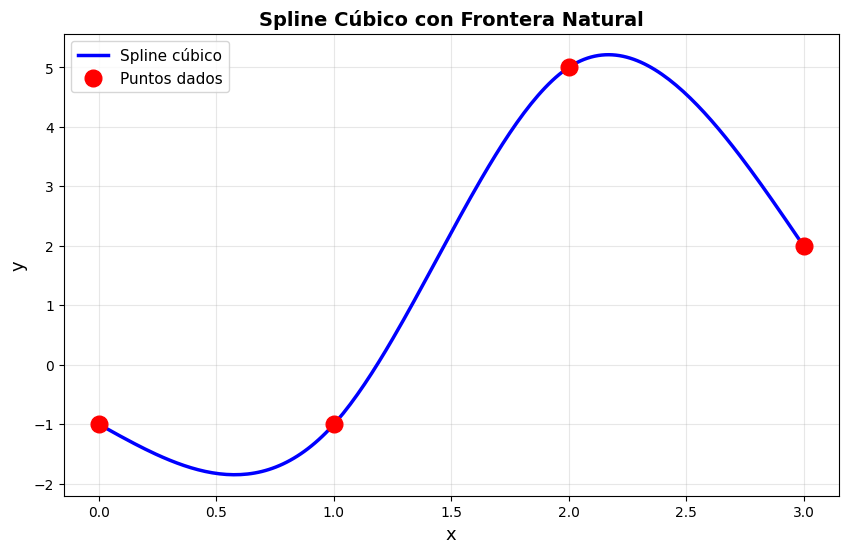

In [ ]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]) -> list:

    points = sorted(zip(xs, ys), key=lambda x: x[0])

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1

    h = [xs[i + 1] - xs[i] for i in range(n)]

    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l.append(2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])

    l.append(1)
    z.append(0)

    c = [0] * (n + 1)

    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]

    b = [(ys[i + 1] - ys[i]) / h[i] - h[i] * (c[i + 1] + 2 * c[i]) / 3 for i in range(n)]
    d = [(c[i + 1] - c[i]) / (3 * h[i]) for i in range(n)]
    a = [ys[i] for i in range(n)]

    return a, b, c[:-1], d

def evaluar_spline(x_data, coef, x_eval):
    a, b, c, d = coef
    y = np.zeros_like(x_eval)
    for i, xi in enumerate(x_eval):
        j = np.searchsorted(x_data[1:], xi)
        j = min(j, len(a)-1)
        dx = xi - x_data[j]
        y[i] = a[j] + b[j]*dx + c[j]*dx**2 + d[j]*dx**3
    return y

def crear_tabla_coeficientes(x, a, b, c, d):
    tabla = pd.DataFrame({
        'Intervalo': [f'[{x[i]}, {x[i+1]}]' for i in range(len(a))],
        'a': [f'{a[i]:.4f}' for i in range(len(a))],
        'b': [f'{b[i]:.4f}' for i in range(len(b))],
        'c': [f'{c[i]:.4f}' for i in range(len(c))],
        'd': [f'{d[i]:.4f}' for i in range(len(d))],
    })
    print("\nCoeficientes del Spline:")
    print(tabla.to_string(index=False))

def crear_tabla_ecuaciones(x, a, b, c, d):
    ecuaciones = []
    for i in range(len(a)):
        ecuacion = f"S_{i}(x) = {a[i]:.2f} + {b[i]:.2f}(x-{x[i]:.2f}) + {c[i]:.2f}(x-{x[i]:.2f})² + {d[i]:.2f}(x-{x[i]:.2f})³"
        ecuaciones.append(ecuacion)

    tabla_ecuaciones = pd.DataFrame({
        'Intervalo': [f'[{x[i]}, {x[i+1]}]' for i in range(len(a))],
        'Ecuación': ecuaciones
    })
    print("\nEcuaciones del Spline:")
    print(tabla_ecuaciones.to_string(index=False))


xs = [0, 1, 2, 3]
ys = [-1, -1, 5, 2]

splines = cubic_spline(xs=xs, ys=ys)

crear_tabla_coeficientes(xs, *splines)
crear_tabla_ecuaciones(xs, *splines)

x_plot = np.linspace(0, 3, 200)
y_plot = evaluar_spline(xs, splines, x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, 'b-', linewidth=2.5, label='Spline cúbico')
plt.plot(xs, ys, 'ro', markersize=12, label='Puntos dados')
plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('Spline Cúbico con Frontera Natural', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.show()


## Ejercicio 6

 Use la función cubic_spline_clamped, provista en el enlace de Github, para graficar los datos de la siguiente tabla.

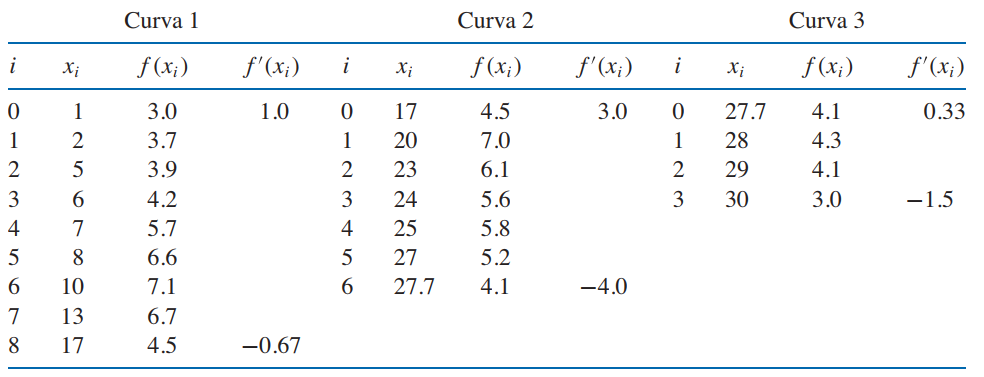

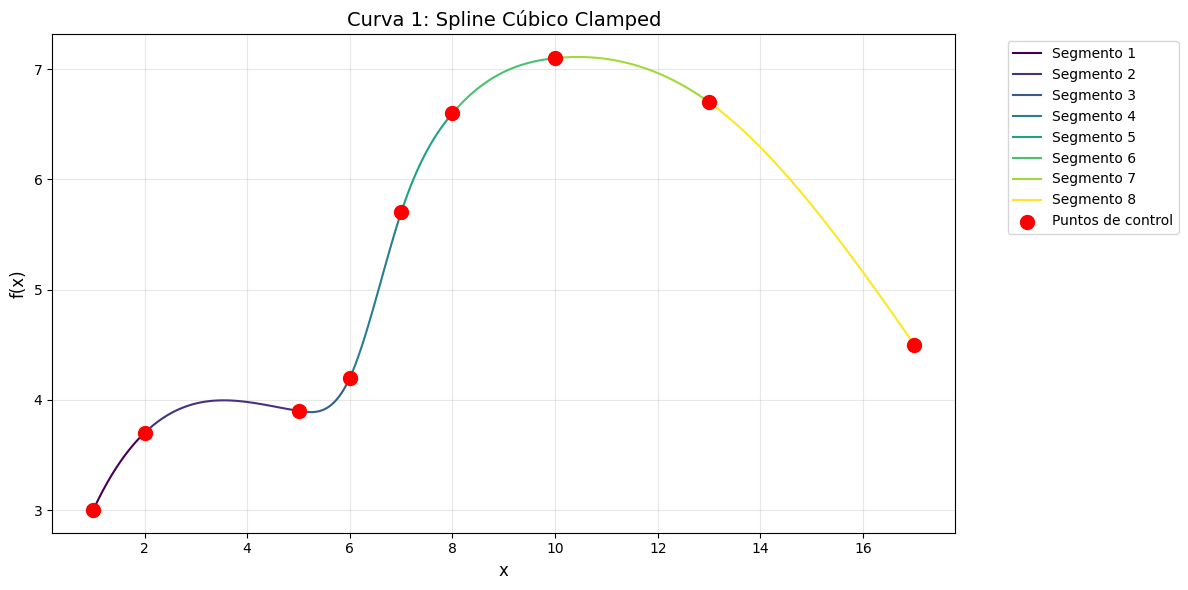

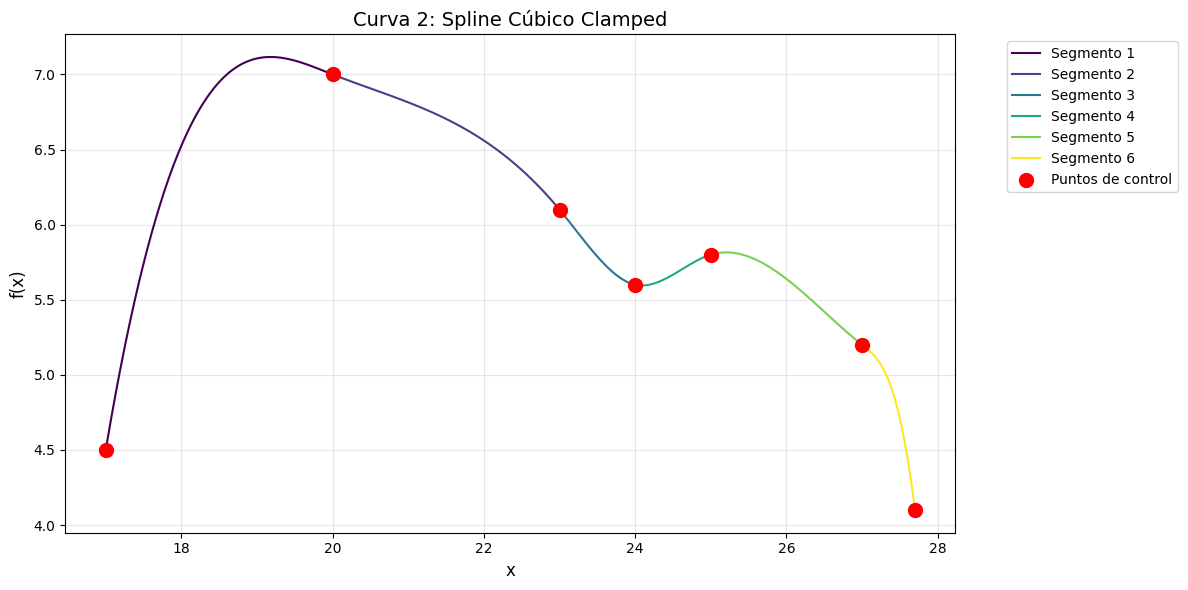

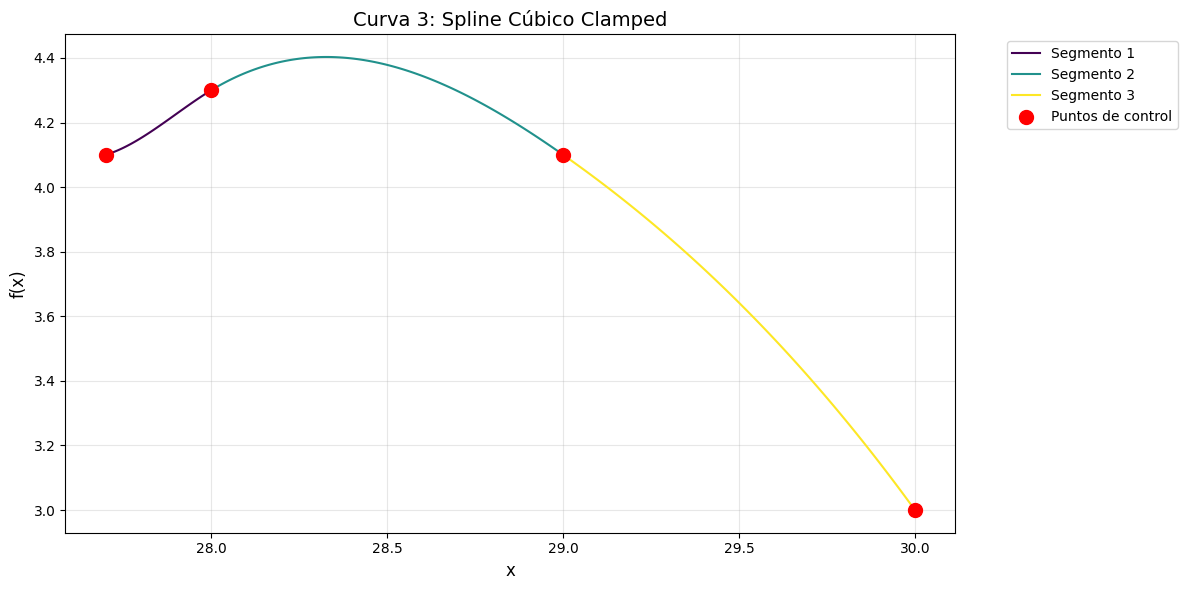


--------------------------------------------------
Ecuaciones para Curva 1:
--------------------------------------------------


<IPython.core.display.Math object>

Forma expandida: 0.0468099653460708 x^{3} - 0.487239861384283 x^{2} + 1.83404982673035 x + 1.60638006930786



<IPython.core.display.Math object>

Forma expandida: 0.0265552121382411 x^{3} - 0.365711342137305 x^{2} + 1.5909927882364 x + 1.7684180949705



<IPython.core.display.Math object>

Forma expandida: 0.341862882832256 x^{3} - 5.09532640254753 x^{2} + 25.2390680902875 x - 37.6450407417814



<IPython.core.display.Math object>

Forma expandida: - 0.574548094033905 x^{3} + 11.4000711810434 x^{2} - 73.7333174112578 x + 160.299730261309



<IPython.core.display.Math object>

Forma expandida: 0.156329493303363 x^{3} - 3.94835815303925 x^{2} + 33.7056879273205 x - 90.3912821953733



<IPython.core.display.Math object>

Forma expandida: 0.0239201086447503 x^{3} - 0.770532921232554 x^{2} + 8.28308607286689 x - 22.5976772501638



<IPython.core.display.Math object>

Forma expandida: - 0.00255606547823463 x^{3} + 0.023752302456995 x^{2} + 0.340233835971401 x + 3.87849687282113



<IPython.core.display.Math object>

Forma expandida: 0.00574178139926946 x^{3} - 0.299863725765665 x^{2} + 4.54724220286598 x - 14.3518727170554


--------------------------------------------------
Ecuaciones para Curva 2:
--------------------------------------------------


<IPython.core.display.Math object>

Forma expandida: 0.12616207628025 x^{3} - 7.53497434135573 x^{2} + 149.806607471118 x - 984.439023122068



<IPython.core.display.Math object>

Forma expandida: - 0.022930673285195 x^{3} + 1.41059063257098 x^{2} - 29.1046920074162 x + 208.302973401493



<IPython.core.display.Math object>

Forma expandida: 0.280127236863149 x^{3} - 19.5004051676648 x^{2} + 451.848211398006 x - 3479.00261937341



<IPython.core.display.Math object>

Forma expandida: - 0.357384536100794 x^{3} + 26.4004424857391 x^{2} - 649.772132283688 x + 5333.96013008014



<IPython.core.display.Math object>

Forma expandida: 0.0882021573401092 x^{3} - 7.0185595223286 x^{2} + 185.702917918006 x - 1628.33195493397



<IPython.core.display.Math object>

Forma expandida: - 2.56800212665878 x^{3} + 208.133987481581 x^{2} - 5623.41585118756 x + 50653.7369670161


--------------------------------------------------
Ecuaciones para Curva 3:
--------------------------------------------------


<IPython.core.display.Math object>

Forma expandida: - 3.79941327466078 x^{3} + 317.993289328931 x^{2} - 8870.74279427938 x + 82483.079611294



<IPython.core.display.Math object>

Forma expandida: 0.296039603960395 x^{3} - 26.0247524752475 x^{2} + 761.762376237622 x - 7420.30198019801



<IPython.core.display.Math object>

Forma expandida: - 0.0653465346534656 x^{3} + 5.41584158415843 x^{2} - 150.014851485149 x + 1393.54455445545


Verificación de continuidad en puntos intermedios:
x = 2: f = 4.44089209850063E-16, f' = 1.11022302462516E-16, f'' = -5.55111512312578E-17
x = 5: f = 8.88178419700125E-16, f' = 0, f'' = 7.77156117237610E-16
x = 6: f = -8.88178419700125E-16, f' = 0, f'' = 0
x = 7: f = 8.88178419700125E-16, f' = 4.44089209850063E-16, f'' = -1.77635683940025E-15
x = 8: f = 8.88178419700125E-16, f' = 8.88178419700125E-16, f'' = 4.44089209850063E-16
x = 10: f = 0, f' = 2.22044604925031E-16, f'' = 2.77555756156289E-17
x = 13: f = 0, f' = -2.22044604925031E-16, f'' = -2.77555756156289E-17

Verificación de continuidad en puntos intermedios:
x = 20: f = -8.88178419700125E-16, f' = -5.32907051820075E-15, f'' = -4.44089209850063E-16
x = 23: f = 0, f' = 4.44089209850063E-16, f'' = 4.44089209850063E-16
x = 24: f = -1.77635683940025E-15, f' = -1.77635683940025E-15, f'' = 0
x = 25: f = 0, f' = 8.881784197001

In [24]:
import sympy as sym
from IPython.display import display, Math
import matplotlib.pyplot as plt
import numpy as np

def cubic_spline_clamped(xs: list[float], ys: list[float], B0: float, B1: float) -> list[sym.Symbol]:
    points = sorted(zip(xs, ys), key=lambda x: x[0])
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1
    h = [xs[i+1] - xs[i] for i in range(n)]

    alpha = [0] * (n+1)
    alpha[0] = 3/h[0]*(ys[1]-ys[0]) - 3*B0
    alpha[-1] = 3*B1 - 3/h[n-1]*(ys[n]-ys[n-1])
    for i in range(1, n):
        alpha[i] = 3/h[i]*(ys[i+1]-ys[i]) - 3/h[i-1]*(ys[i]-ys[i-1])

    l = [2*h[0]]
    mu = [0.5]
    z = [alpha[0]/l[0]]
    for i in range(1, n):
        l.append(2*(xs[i+1]-xs[i-1]) - h[i-1]*mu[i-1])
        mu.append(h[i]/l[i])
        z.append((alpha[i] - h[i-1]*z[i-1])/l[i])
    l.append(h[n-1]*(2 - mu[n-1]))
    z.append((alpha[n] - h[n-1]*z[n-1])/l[n])

    c = [0]*(n+1)
    c[-1] = z[-1]

    x = sym.Symbol('x')
    splines = []
    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j]*c[j+1]
        b = (ys[j+1]-ys[j])/h[j] - h[j]*(c[j+1]+2*c[j])/3
        d = (c[j+1]-c[j])/(3*h[j])
        a = ys[j]
        S = a + b*(x-xs[j]) + c[j]*(x-xs[j])**2 + d*(x-xs[j])**3
        splines.append(S)
    splines.reverse()
    return splines

# -------------------- FUNCIÓN DE GRÁFICA --------------------
def plot_splines(xs, ys, splines, title, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    colors = plt.cm.viridis(np.linspace(0, 1, len(splines)))
    x_sym = sym.Symbol('x')

    for i in range(len(splines)):
        x_segment = np.linspace(xs[i], xs[i+1], 100)
        y_segment = [splines[i].subs(x_sym, val) for val in x_segment]
        plt.plot(x_segment, y_segment, color=colors[i], label=f'Segmento {i+1}')

    plt.scatter(xs, ys, color='red', s=100, zorder=5, label='Puntos de control')
    plt.title(title, fontsize=14)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('f(x)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# -------------------- MOSTRAR ECUACIONES --------------------
def display_equations(splines, xs, curve_name):
    print(f"\n{'-'*50}")
    print(f"Ecuaciones para {curve_name}:")
    print(f"{'-'*50}")
    for i, s in enumerate(splines):
        display(Math(f"S_{i}(x) = {sym.latex(s.simplify())} \\quad \\text{{para }} x \\in [{xs[i]}, {xs[i+1]}]"))
        print(f"Forma expandida: {sym.latex(s.expand())}\n")

# -------------------- VERIFICAR FRONTERAS --------------------
def verify_boundary_conditions(splines, xs, ys, B0, B1):
    x = sym.Symbol('x')
    print("\nVerificación de condiciones de frontera:")
    S0_prime = sym.diff(splines[0], x)
    Sn_prime = sym.diff(splines[-1], x)
    calculated_B0 = S0_prime.subs(x, xs[0])
    calculated_B1 = Sn_prime.subs(x, xs[-1])
    print(f"f'({xs[0]}) calculado: {calculated_B0.evalf()}, esperado: {B0}")
    print(f"f'({xs[-1]}) calculado: {calculated_B1.evalf()}, esperado: {B1}")

# -------------------- VERIFICAR CONTINUIDAD --------------------
def check_continuity(splines, xs):
    x = sym.Symbol('x')
    print("\nVerificación de continuidad en puntos intermedios:")
    for i in range(1, len(splines)):
        left = splines[i-1]
        right = splines[i]
        point = xs[i]
        f_cont = sym.simplify(left.subs(x, point) - right.subs(x, point))
        f_prime_cont = sym.simplify(sym.diff(left, x).subs(x, point) - sym.diff(right, x).subs(x, point))
        f_double_prime_cont = sym.simplify(sym.diff(left, x, 2).subs(x, point) - sym.diff(right, x, 2).subs(x, point))
        print(f"x = {point}: f = {f_cont}, f' = {f_prime_cont}, f'' = {f_double_prime_cont}")

# -------------------- DATOS DE LAS CURVAS --------------------
# Curva 1
xs1 = [1, 2, 5, 6, 7, 8, 10, 13, 17]
ys1 = [3.0, 3.7, 3.9, 4.2, 5.7, 6.6, 7.1, 6.7, 4.5]
B0_1 = 1.0
B1_1 = -0.67

# Curva 2
xs2 = [17, 20, 23, 24, 25, 27, 27.7]
ys2 = [4.5, 7.0, 6.1, 5.6, 5.8, 5.2, 4.1]
B0_2 = 3.0
B1_2 = -4.0

# Curva 3
xs3 = [27.7, 28, 29, 30]
ys3 = [4.1, 4.3, 4.1, 3.0]
B0_3 = 0.33
B1_3 = -1.5

# -------------------- CALCULAR SPLINES --------------------
splines1 = cubic_spline_clamped(xs=xs1, ys=ys1, B0=B0_1, B1=B1_1)
splines2 = cubic_spline_clamped(xs=xs2, ys=ys2, B0=B0_2, B1=B1_2)
splines3 = cubic_spline_clamped(xs=xs3, ys=ys3, B0=B0_3, B1=B1_3)

# -------------------- GRAFICAR CURVAS --------------------
plot_splines(xs1, ys1, splines1, 'Curva 1: Spline Cúbico Clamped')
plot_splines(xs2, ys2, splines2, 'Curva 2: Spline Cúbico Clamped')
plot_splines(xs3, ys3, splines3, 'Curva 3: Spline Cúbico Clamped')

# -------------------- MOSTRAR ECUACIONES --------------------
display_equations(splines1, xs1, "Curva 1")
display_equations(splines2, xs2, "Curva 2")
display_equations(splines3, xs3, "Curva 3")

# # -------------------- VERIFICAR FRONTERAS Y CONTINUIDAD --------------------
# verify_boundary_conditions(splines1, xs1, ys1, B0_1, B1_1)
# verify_boundary_conditions(splines2, xs2, ys2, B0_2, B1_2)
# verify_boundary_conditions(splines3, xs3, ys3, B0_3, B1_3)

check_continuity(splines1, xs1)
check_continuity(splines2, xs2)
check_continuity(splines3, xs3)
